<a href="https://colab.research.google.com/github/harikan11/Spotify-analysis/blob/main/Spotifyanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 138 kB 43.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id="179379413eb64e89bb6826a89a3f947b",client_secret="ee48a3e82ac04a99bc1082e8752be0e9")
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2021', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        artist_id.append(t['artists'][0]['id'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        track_popularity.append(t['popularity'])

In [ ]:
import pandas as pd
track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'track_popularity' : track_popularity, 'artist_id' : artist_id})
print(track_df.shape)
track_df.head()

(1000, 5)


,artist_name,track_name,track_id,track_popularity,artist_id
0,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,89,1McMsnEElThX1knmY4oliG
1,LYMEY,END OF YEAR 2021,6usFCFN0F69JcAaHtB55sg,36,6dPOSlnP4zgYg7bkAkp4dY
2,Doja Cat,Woman,6Uj1ctrBOjOas8xZXGqKk4,90,5cj0lLjcoR7YOSnhnX0Po5
3,Elvis Costello & The Attractions,Pump It Up - 2021 Remaster,3oyc1mIdCBGaU55wX7otqM,60,4qmHkMxr6pTWh5Zo74odpH
4,Drake,Knife Talk (with 21 Savage ft. Project Pat),2BcMwX1MPV6ZHP4tUT9uq6,83,3TVXtAsR1Inumwj472S9r4


In [ ]:
artist_popularity = []
artist_genres = []
artist_followers = []
for a_id in track_df.artist_id:
  artist = sp.artist(a_id)
  artist_popularity.append(artist['popularity'])
  artist_genres.append(artist['genres'])
  artist_followers.append(artist['followers']['total'])

In [ ]:
track_df = track_df.assign(artist_popularity=artist_popularity, artist_genres=artist_genres, artist_followers=artist_followers)
track_df.head()

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,89,1McMsnEElThX1knmY4oliG,86,[pop],17029329
1,LYMEY,END OF YEAR 2021,6usFCFN0F69JcAaHtB55sg,36,6dPOSlnP4zgYg7bkAkp4dY,22,[],534
2,Doja Cat,Woman,6Uj1ctrBOjOas8xZXGqKk4,90,5cj0lLjcoR7YOSnhnX0Po5,88,"[dance pop, pop]",18931290
3,Elvis Costello & The Attractions,Pump It Up - 2021 Remaster,3oyc1mIdCBGaU55wX7otqM,60,4qmHkMxr6pTWh5Zo74odpH,53,"[art rock, folk rock, mellow gold, new wave po...",229420
4,Drake,Knife Talk (with 21 Savage ft. Project Pat),2BcMwX1MPV6ZHP4tUT9uq6,83,3TVXtAsR1Inumwj472S9r4,94,"[canadian hip hop, canadian pop, hip hop, rap,...",63590240


In [ ]:
track_features = []
for t_id in track_df['track_id']:
  af = sp.audio_features(t_id)
  track_features.append(af)
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
for item in track_features:
  for feat in item:
    tf_df = tf_df.append(feat, ignore_index=True)
tf_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.563,0.664,9,-5.044,1,0.1540,0.33500,0,0.0849,0.688,166.928,audio_features,4ZtFanR9U6ndgddUvNcjcG,spotify:track:4ZtFanR9U6ndgddUvNcjcG,https://api.spotify.com/v1/tracks/4ZtFanR9U6nd...,https://api.spotify.com/v1/audio-analysis/4ZtF...,178147,4
1,0.429,0.829,6,-5.071,0,0.0604,0.02380,0.000174,0.6730,0.278,127.083,audio_features,6usFCFN0F69JcAaHtB55sg,spotify:track:6usFCFN0F69JcAaHtB55sg,https://api.spotify.com/v1/tracks/6usFCFN0F69J...,https://api.spotify.com/v1/audio-analysis/6usF...,1472769,4
2,0.824,0.764,5,-4.175,0,0.0854,0.08880,0.00294,0.1170,0.881,107.998,audio_features,6Uj1ctrBOjOas8xZXGqKk4,spotify:track:6Uj1ctrBOjOas8xZXGqKk4,https://api.spotify.com/v1/tracks/6Uj1ctrBOjOa...,https://api.spotify.com/v1/audio-analysis/6Uj1...,172627,4
3,0.645,0.809,11,-6.120,1,0.0385,0.00921,0.00108,0.1060,0.966,138.978,audio_features,3oyc1mIdCBGaU55wX7otqM,spotify:track:3oyc1mIdCBGaU55wX7otqM,https://api.spotify.com/v1/tracks/3oyc1mIdCBGa...,https://api.spotify.com/v1/audio-analysis/3oyc...,196680,4
4,0.849,0.424,5,-9.579,0,0.3240,0.06350,0,0.0834,0.153,145.887,audio_features,2BcMwX1MPV6ZHP4tUT9uq6,spotify:track:2BcMwX1MPV6ZHP4tUT9uq6,https://api.spotify.com/v1/tracks/2BcMwX1MPV6Z...,https://api.spotify.com/v1/audio-analysis/2BcM...,242966,4


In [ ]:
cols_to_drop2 = ['key','mode','type', 'uri','track_href','analysis_url']
tf_df = tf_df.drop(columns=cols_to_drop2)
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   object
 1   track_name         1000 non-null   object
 2   track_id           1000 non-null   object
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   object
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1000 non-null   float64
 1   energy            1000 non-null   float64
 2   loudness          1000 non-null   float64
 3   speechiness       1000 

In [ ]:
track_df['artist_name'] = track_df['artist_name'].astype("string")
track_df['track_name'] = track_df['track_name'].astype("string")
track_df['track_id'] = track_df['track_id'].astype("string")
track_df['artist_id'] = track_df['artist_id'].astype("string")
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype("category")
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   string
 1   track_name         1000 non-null   string
 2   track_id           1000 non-null   string
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   string
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      1000 non-null   float64 
 1   energy            1000 non-null   float64 
 2   loudness          1000 non-null   float64 
 3   speechi

In [ ]:
track_df.sort_values(by=['track_popularity'], ascending=False)[['track_name', 'artist_name']].head(20)


,track_name,artist_name
122,Where Are You Now,Lost Frequencies
2,Woman,Doja Cat
28,abcdefu,GAYLE
14,Enemy (with JID) - from the series Arcane Leag...,Imagine Dragons
50,Bad Habits,Ed Sheeran
44,The Motto,Tiësto
42,Cold Heart - PNAU Remix,Elton John
32,Shivers,Ed Sheeran
18,STAY (with Justin Bieber),The Kid LAROI
150,Envolver,Anitta


In [ ]:
by_art_fol = pd.DataFrame(track_df.sort_values(by=['artist_followers'], ascending=False)[['artist_followers','artist_popularity', 'artist_name','artist_genres']])
by_art_fol.astype(str).drop_duplicates().head(20)

,artist_followers,artist_popularity,artist_name,artist_genres
760,97514086,91,Ed Sheeran,"['pop', 'uk pop']"
286,63590240,94,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
580,62680106,87,Billie Eilish,"['art pop', 'electropop', 'pop']"
148,61023678,91,Justin Bieber,"['canadian pop', 'pop']"
874,55822100,89,Eminem,"['detroit hip hop', 'hip hop', 'rap']"
940,53441155,93,Taylor Swift,['pop']
200,49899808,91,BTS,"['k-pop', 'k-pop boy group']"
60,48787459,100,Bad Bunny,"['latin', 'reggaeton', 'trap latino']"
176,45051218,92,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ..."
134,40637415,87,Bruno Mars,"['dance pop', 'pop']"


In [ ]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])
to_1D(track_df['artist_genres']).value_counts().head(20)


progressive house       176
trance                  160
pop                     147
uplifting trance        135
progressive trance      125
edm                     120
pop dance               105
rap                      86
contemporary country     58
dance pop                55
hip hop                  53
rock                     50
trap                     49
mellow gold              45
art rock                 45
folk rock                43
roots rock               42
new wave pop             41
pub rock                 41
power pop                41
dtype: int64

Text(0.5, 1.0, 'Top genres')

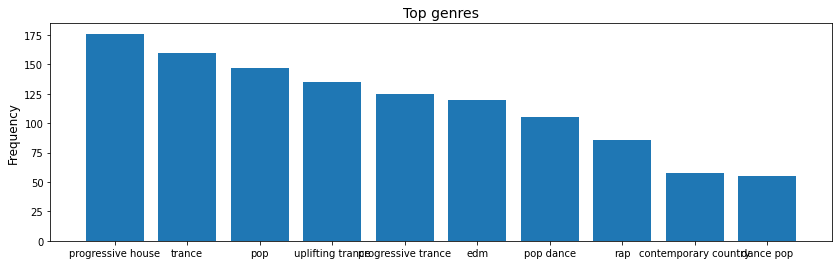

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(track_df['artist_genres']).value_counts().index[:10],
        to_1D(track_df['artist_genres']).value_counts().values[:10])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top genres", size = 14)

In [ ]:
top_10_genres = list(to_1D(track_df['artist_genres']).value_counts().index[:20])
top_artists_by_genre = []
for genre in top_10_genres:
  for index, row in by_art_fol.iterrows():
    if genre in row['artist_genres']:
      top_artists_by_genre.append({'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_artists_by_genre)

,artist_name,artist_genre
0,Armin van Buuren,progressive house
1,Tiësto,trance
2,Ed Sheeran,pop
3,Above & Beyond,uplifting trance
4,Above & Beyond,progressive trance
5,Marshmello,edm
6,Marshmello,pop dance
7,Drake,rap
8,Luke Combs,contemporary country
9,Bruno Mars,dance pop


In [ ]:
by_track_pop = pd.DataFrame(track_df.sort_values(by=['track_popularity'], ascending=False)[['track_popularity','track_name', 'artist_name','artist_genres', 'track_id']])
by_track_pop.astype(str).drop_duplicates().head(20)
top_songs_by_genre = []
for genre in top_10_genres:
  for index, row in by_track_pop.iterrows():
    if genre in row['artist_genres']:
      top_songs_by_genre.append({'track_name':row['track_name'], 'track_popularity':row['track_popularity'],'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_songs_by_genre)

,track_name,track_popularity,artist_name,artist_genre
0,Sirius (Mixed),37,Armin van Buuren,progressive house
1,The Motto,89,Tiësto,trance
2,Where Are You Now,90,Lost Frequencies,pop
3,Feel It (Mixed),36,Cosmic Gate,uplifting trance
4,Feel It (Mixed),36,Cosmic Gate,progressive trance
5,Where Are You Now,90,Lost Frequencies,edm
6,Where Are You Now,90,Lost Frequencies,pop dance
7,One Right Now (with The Weeknd),85,Post Malone,rap
8,Wasted On You,80,Morgan Wallen,contemporary country
9,Woman,90,Doja Cat,dance pop


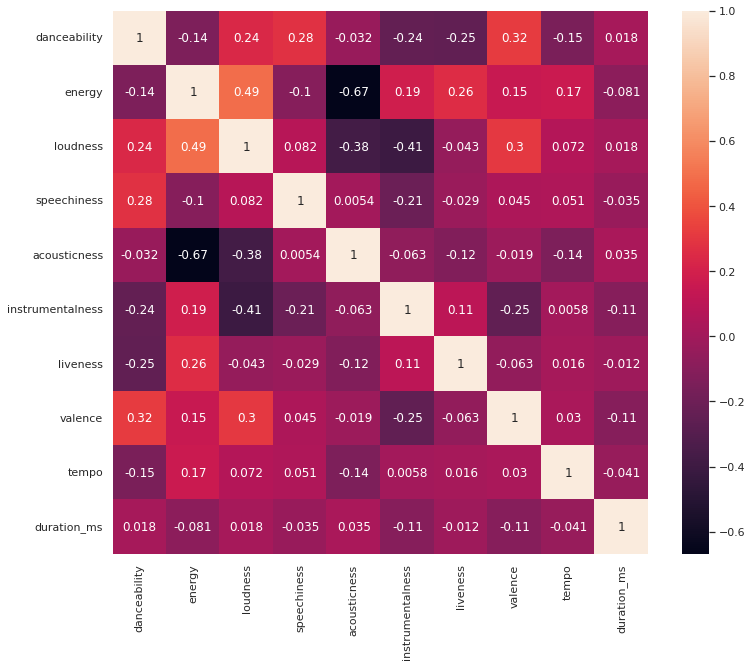

In [ ]:
import seaborn as sn
sn.set(rc = {'figure.figsize':(12,10)})
sn.heatmap(tf_df.corr(), annot=True)
plt.show()

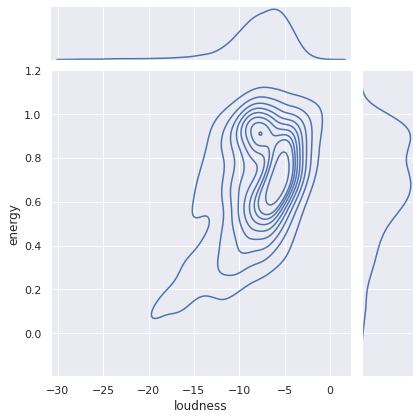

In [ ]:
sn.set(rc = {'figure.figsize':(20,20)})
sn.jointplot(data=tf_df, x="loudness", y="energy", kind="kde")

In [ ]:
rec = sp.recommendations(seed_artists=["3PhoLpVuITZKcymswpck5b"], seed_genres=["pop"], seed_tracks=["1r9xUipOqoNwggBpENDsvJ"], limit=100)
for track in rec['tracks']:
  print(track['artists'][0]['name'], track['name'])

DJ Khaled Do You Mind (feat. Nicki Minaj, Chris Brown, August Alsina, Jeremih, Future & Rick Ross)
Billy Ocean Caribbean Queen (No More Love On the Run)
Eminem Venom - Music From The Motion Picture
K/DA MORE
Drake God's Plan
Clean Bandit Tears (feat. Louisa Johnson)
Yuna Crush
Billy Joel My Life
Duncan Laurence Arcade (feat. FLETCHER)
Confetti Dear God
Tones And I Welcome To The Madhouse
Elton John Saturday Night’s Alright (For Fighting) - Remastered 2014
Nicki Minaj Feeling Myself
R3HAB Sad Boy (feat. Ava Max & Kylie Cantrall)
Bee Gees You Win Again
Astrid S Such A Boy
NOTD I Wanna Know (feat. Bea Miller)
Bryson Tiller Don't
5 Seconds of Summer Youngblood
Elton John This Train Don't Stop There Anymore
Sean Paul No Lie
Simon & Garfunkel Cecilia
Lil Dicky Freaky Friday (feat. Chris Brown)
John Mellencamp Jack & Diane
John Lennon Woman - Remastered 2010
Milky Chance Colorado
Daryl Hall & John Oates Maneater
Supertramp The Logical Song - Remastered 2010
Robert Palmer Addicted To Love
Zedd